# Lung Cancer Prediction

## Data Loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('survey lung cancer.csv')

## Exploratory Data Analysis (EDA) 

In [6]:
df.head(5)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [7]:
df.shape

(309, 16)

In [8]:
df.size

4944

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [10]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [11]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [12]:
df.duplicated().sum()

33

In [13]:
df = df.drop_duplicates()

In [14]:
df.nunique()

GENDER                    2
AGE                      39
SMOKING                   2
YELLOW_FINGERS            2
ANXIETY                   2
PEER_PRESSURE             2
CHRONIC DISEASE           2
FATIGUE                   2
ALLERGY                   2
WHEEZING                  2
ALCOHOL CONSUMING         2
COUGHING                  2
SHORTNESS OF BREATH       2
SWALLOWING DIFFICULTY     2
CHEST PAIN                2
LUNG_CANCER               2
dtype: int64

In [15]:
df.columns = df.columns.str.strip() 

## Data Visualization

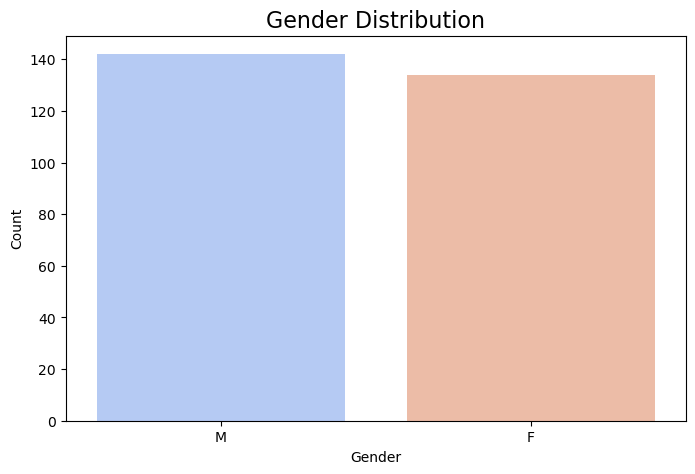

In [17]:
# Plot for Gender Distribution

plt.figure(figsize=(8,5))
sns.countplot(x='GENDER', data=df, palette='coolwarm')
plt.title('Gender Distribution', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

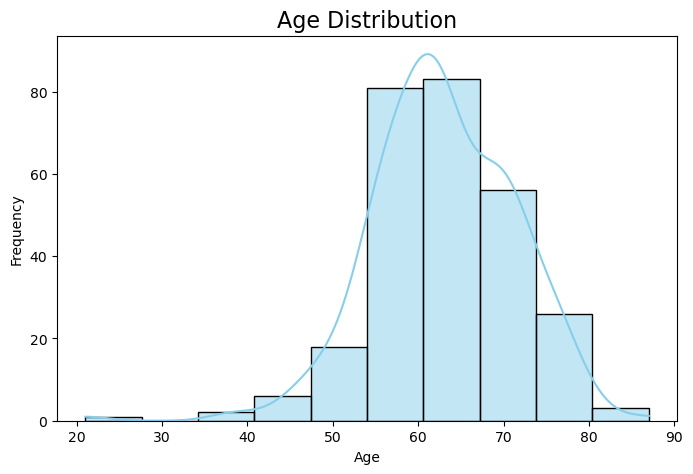

In [18]:
# Plot for Age Distribution

plt.figure(figsize=(8,5))
sns.histplot(df['AGE'], kde=True, color='skyblue', bins=10)
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

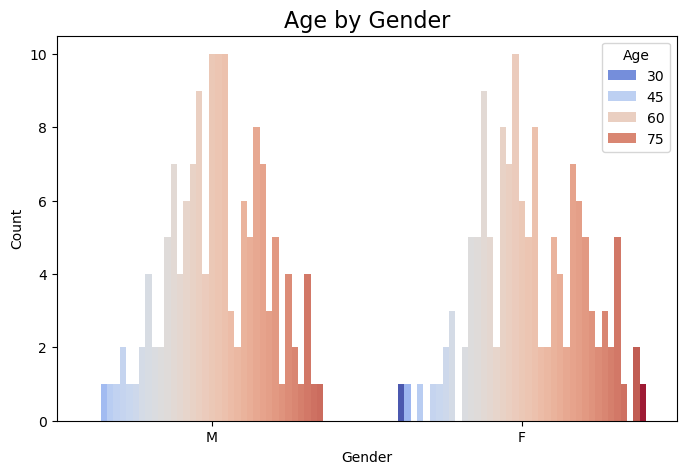

In [19]:
# Plot for Age by Gender

plt.figure(figsize=(8, 5))
sns.countplot(x='GENDER', hue='AGE', data=df, palette='coolwarm')
plt.title('Age by Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Age')
plt.show()

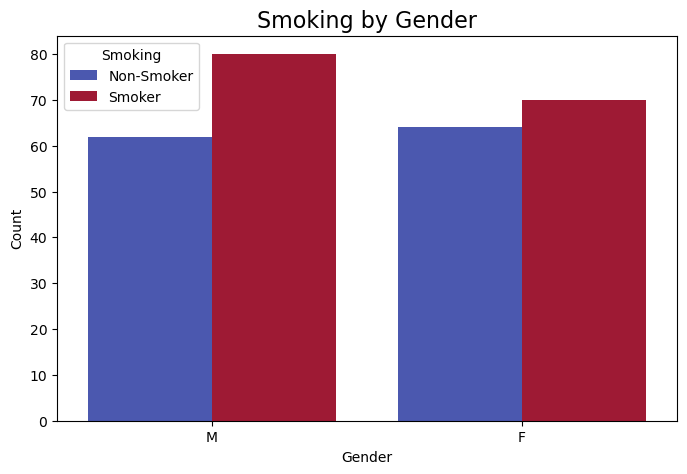

In [20]:
# Plot for Smoking by Gender

plt.figure(figsize=(8, 5))
sns.countplot(x='GENDER', hue='SMOKING', data=df, palette='coolwarm')
plt.title('Smoking by Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Smoking', labels=['Non-Smoker', 'Smoker'])
plt.show()

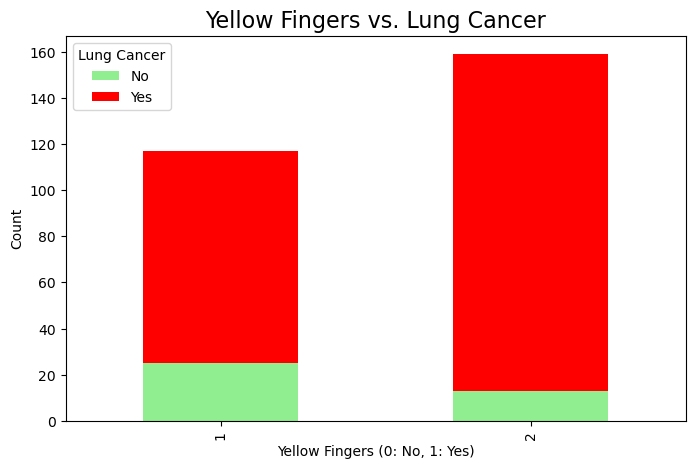

In [21]:
# Plot for comparison between Yellow Fingers vs Lung Cancer

yellow_vs_cancer = pd.crosstab(df['YELLOW_FINGERS'], df['LUNG_CANCER'])
yellow_vs_cancer.plot(kind='bar', stacked=True, color=['lightgreen', 'red'], figsize=(8, 5))
plt.title('Yellow Fingers vs. Lung Cancer', fontsize=16)
plt.xlabel('Yellow Fingers (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Lung Cancer', labels=['No', 'Yes'])
plt.show()

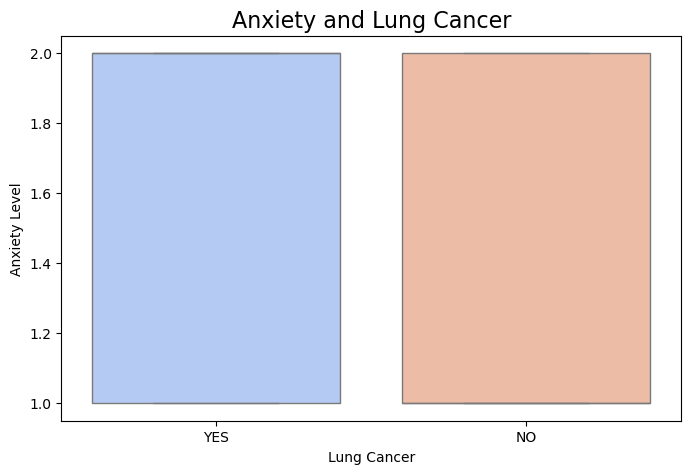

In [22]:
# Plot for Anxiety and Lung Cancer

plt.figure(figsize=(8, 5))
sns.boxplot(x='LUNG_CANCER', y='ANXIETY', data=df, palette='coolwarm')
plt.title('Anxiety and Lung Cancer', fontsize=16)
plt.xlabel('Lung Cancer')
plt.ylabel('Anxiety Level')
plt.show()

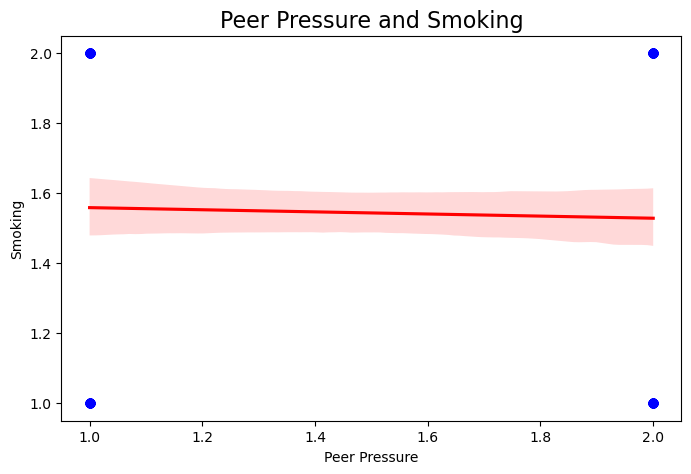

In [23]:
# Plot for Peer Pressure and Smoking

plt.figure(figsize=(8, 5))
sns.regplot(x='PEER_PRESSURE', y='SMOKING', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Peer Pressure and Smoking', fontsize=16)
plt.xlabel('Peer Pressure')
plt.ylabel('Smoking')
plt.show()

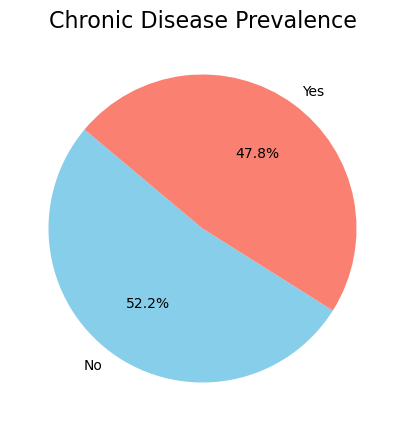

In [24]:
# Plot for Chronic Disease Prevalence

plt.figure(figsize=(8, 5))
chronic_counts = df['CHRONIC DISEASE'].value_counts()
plt.pie(chronic_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Chronic Disease Prevalence', fontsize=16)
plt.show()

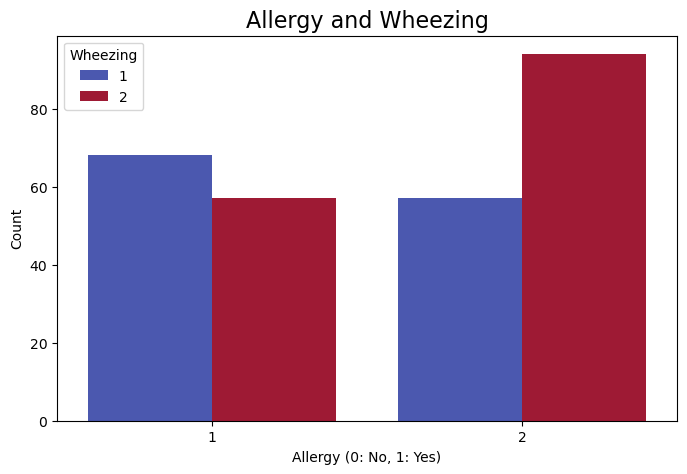

In [25]:
# Plot for Allergy and Wheezing

plt.figure(figsize=(8, 5))
sns.countplot(x='ALLERGY', hue='WHEEZING', data=df, palette='coolwarm')
plt.title('Allergy and Wheezing', fontsize=16)
plt.xlabel('Allergy (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Wheezing')
plt.show()

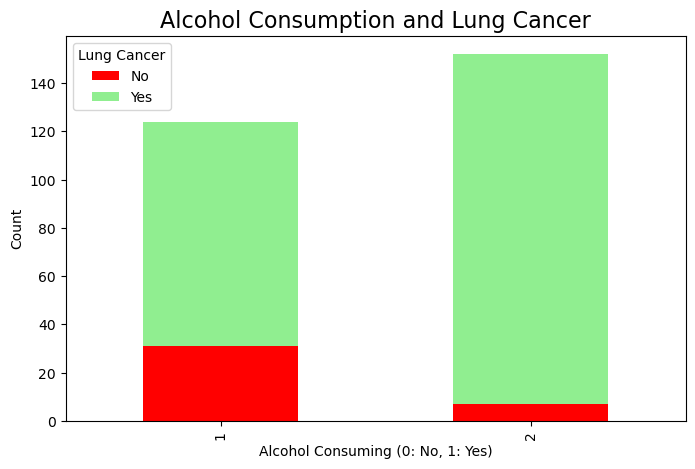

In [26]:
# Plot for Alcohol Consumption and Lung Cancer

alcohol_vs_cancer = pd.crosstab(df['ALCOHOL CONSUMING'], df['LUNG_CANCER'])
alcohol_vs_cancer.plot(kind='bar', stacked=True, figsize=(8, 5), color=['red', 'lightgreen'])
plt.title('Alcohol Consumption and Lung Cancer', fontsize=16)
plt.xlabel('Alcohol Consuming (0: No, 1: Yes)')
plt.ylabel('Count')
plt.legend(title='Lung Cancer', labels=['No', 'Yes'])
plt.show()

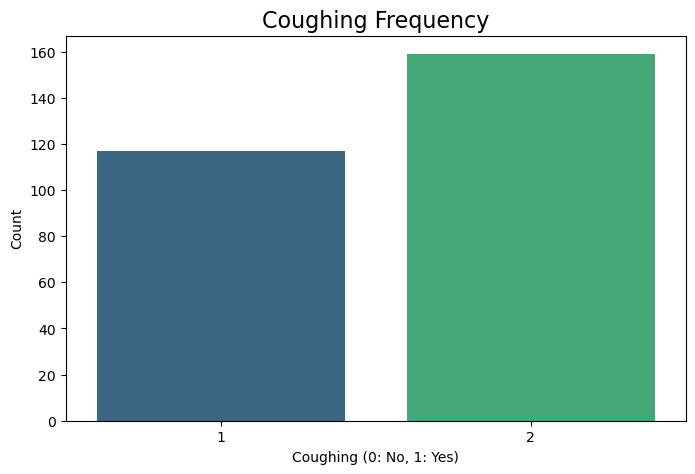

In [27]:
# Plot for Coughing Frequency

plt.figure(figsize=(8, 5))
sns.countplot(x='COUGHING', data=df, palette='viridis')
plt.title('Coughing Frequency', fontsize=16)
plt.xlabel('Coughing (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

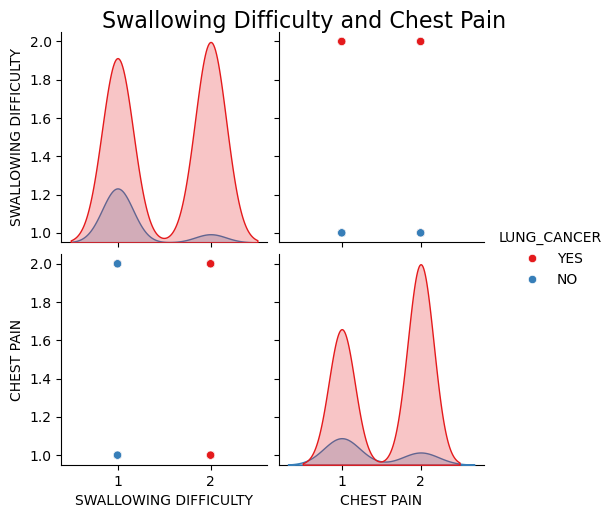

In [28]:
# Plot for Swallowing Difficulty and Chest Pain

sns.pairplot(df, vars=['SWALLOWING DIFFICULTY', 'CHEST PAIN'], hue='LUNG_CANCER', palette='Set1')
plt.suptitle('Swallowing Difficulty and Chest Pain', y=1.02, fontsize=16)
plt.show()

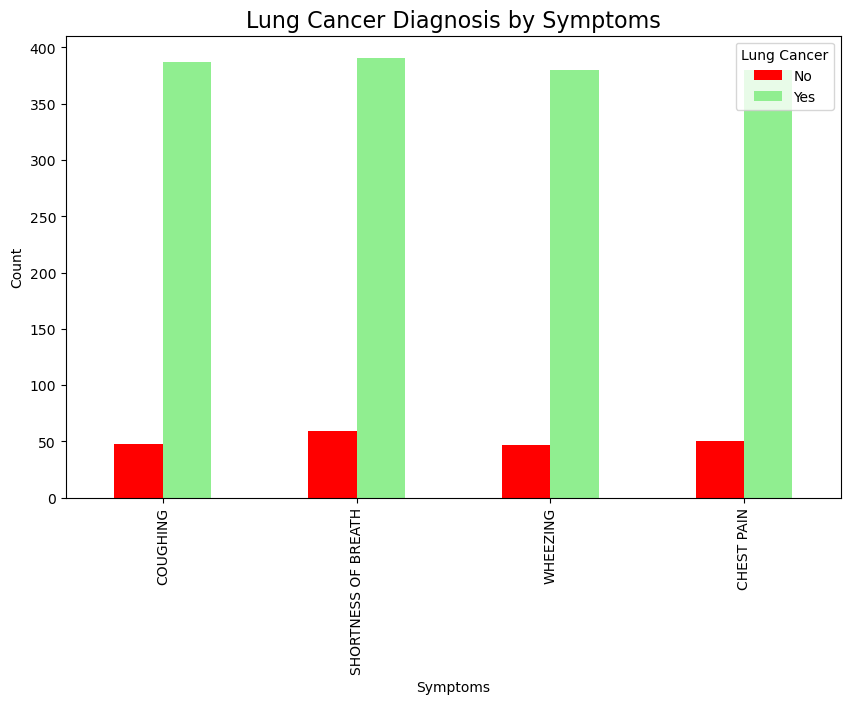

In [29]:
#  Lung Cancer Diagnosis by Symptoms

symptoms = ['COUGHING', 'SHORTNESS OF BREATH', 'WHEEZING', 'CHEST PAIN']
symptom_vs_cancer = df.groupby('LUNG_CANCER')[symptoms].sum().T

symptom_vs_cancer.plot(kind='bar', figsize=(10, 6), color=['red', 'lightgreen'])
plt.title('Lung Cancer Diagnosis by Symptoms', fontsize=16)
plt.xlabel('Symptoms')
plt.ylabel('Count')
plt.legend(title='Lung Cancer', labels=['No', 'Yes'])
plt.show()

## Data Preprocessing & Feature Engineering

In [31]:
# Using label encoder to convert categorical values to numerical values and for normalizing the numiercal values 

from sklearn import preprocessing
le=preprocessing.LabelEncoder()

df['GENDER']=le.fit_transform(df['GENDER'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])
df['SMOKING']=le.fit_transform(df['SMOKING'])
df['YELLOW_FINGERS']=le.fit_transform(df['YELLOW_FINGERS'])
df['ANXIETY']=le.fit_transform(df['ANXIETY'])
df['PEER_PRESSURE']=le.fit_transform(df['PEER_PRESSURE'])
df['CHRONIC DISEASE']=le.fit_transform(df['CHRONIC DISEASE'])
df['FATIGUE']=le.fit_transform(df['FATIGUE'])
df['ALLERGY']=le.fit_transform(df['ALLERGY'])
df['WHEEZING']=le.fit_transform(df['WHEEZING'])
df['ALCOHOL CONSUMING']=le.fit_transform(df['ALCOHOL CONSUMING'])
df['COUGHING']=le.fit_transform(df['COUGHING'])
df['SHORTNESS OF BREATH']=le.fit_transform(df['SHORTNESS OF BREATH'])
df['SWALLOWING DIFFICULTY']=le.fit_transform(df['SWALLOWING DIFFICULTY'])
df['CHEST PAIN']=le.fit_transform(df['CHEST PAIN'])
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int32
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


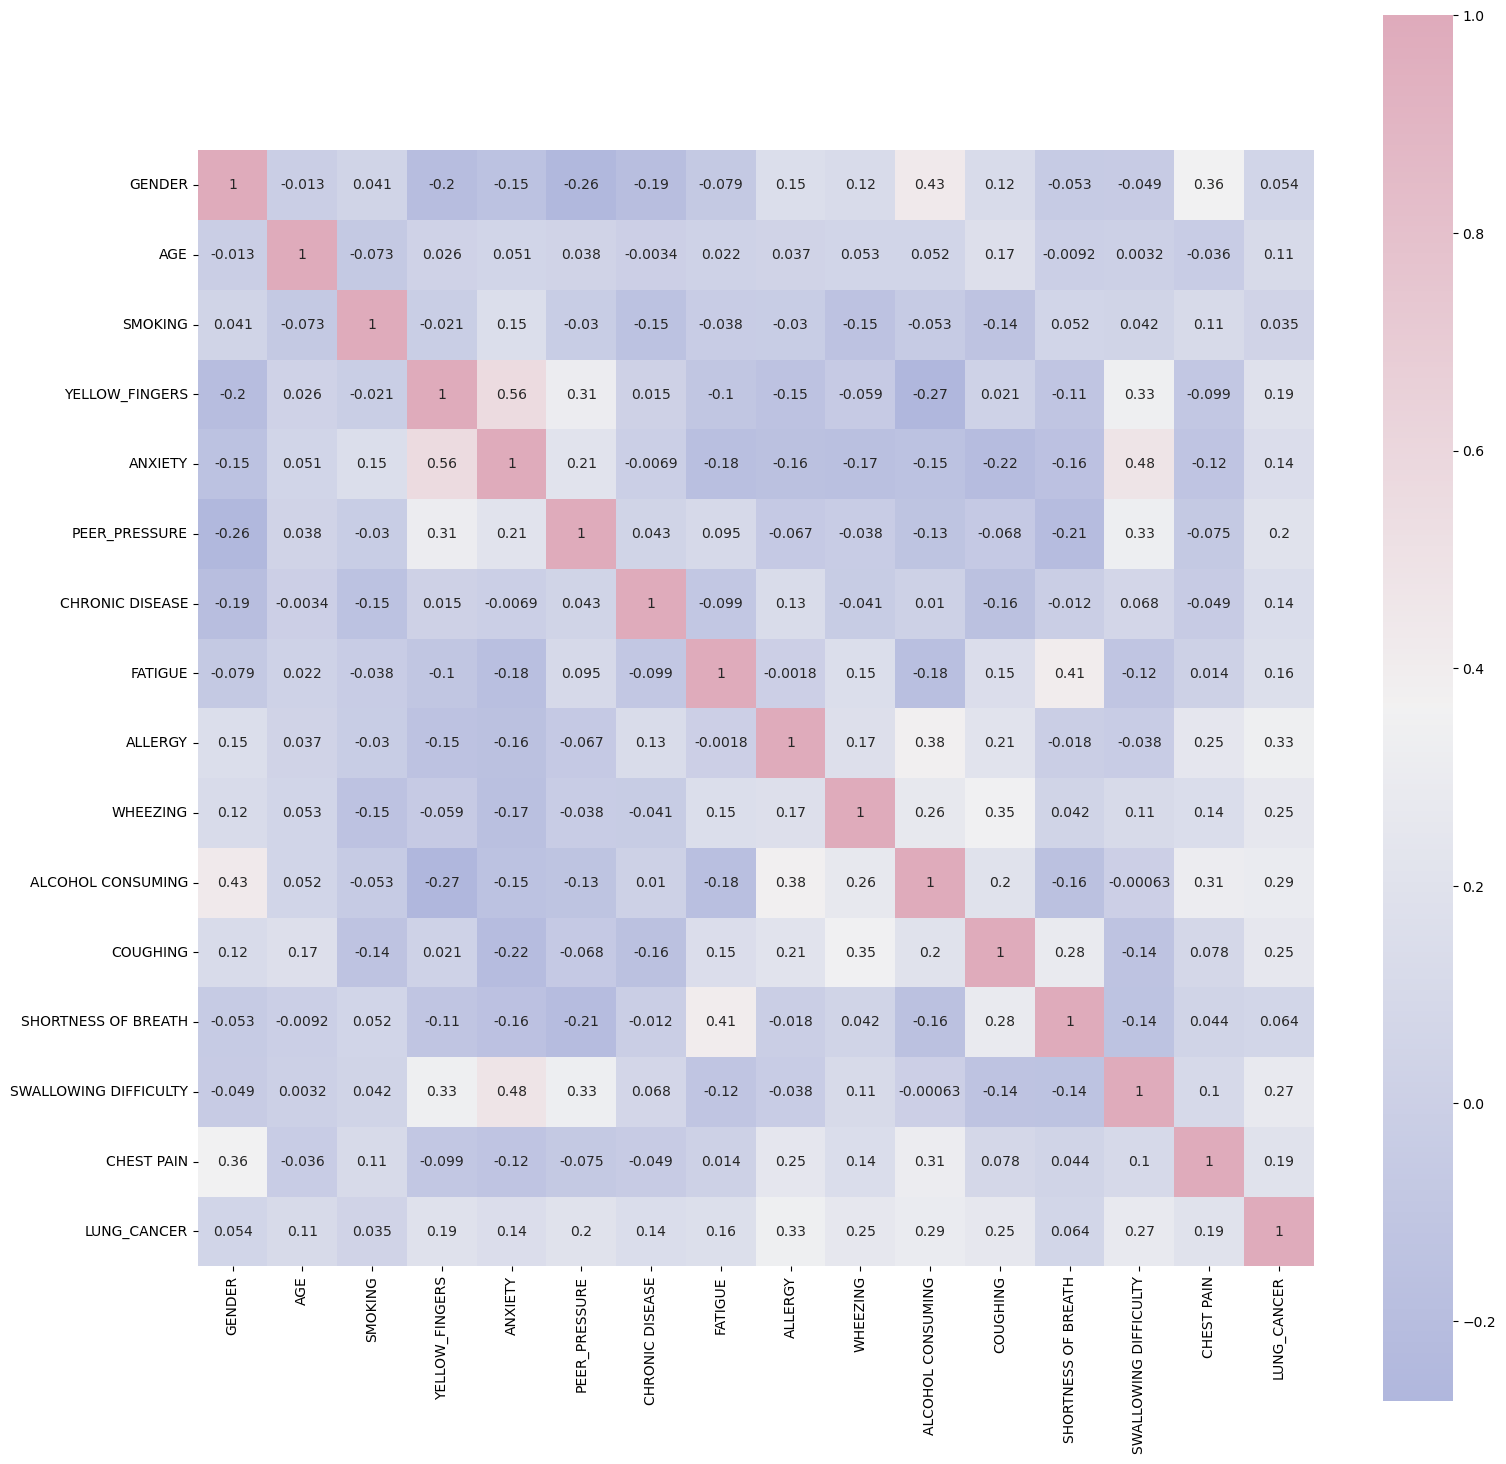

In [33]:
# correlation matrix to check which column to remove

correlation_matrix = df.corr()

cmap=sns.diverging_palette(260,-10,s=50, l=75, n=6,
as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(correlation_matrix,cmap=cmap,annot=True, square=True)
plt.show()

In [34]:
# Checking value counts for each column to check weather the data is imbalance or not

for column in df.columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print('-' * 50)


Value counts for GENDER:
GENDER
1    142
0    134
Name: count, dtype: int64
--------------------------------------------------
Value counts for AGE:
AGE
64    18
60    16
56    16
62    16
59    15
63    15
70    14
61    14
67    11
69    10
55    10
72    10
68     9
71     9
57     9
77     9
58     8
54     7
74     6
65     5
51     5
75     5
73     4
52     4
53     4
66     4
76     3
47     3
49     3
48     2
44     2
78     2
81     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: count, dtype: int64
--------------------------------------------------
Value counts for SMOKING:
SMOKING
1    150
0    126
Name: count, dtype: int64
--------------------------------------------------
Value counts for YELLOW_FINGERS:
YELLOW_FINGERS
1    159
0    117
Name: count, dtype: int64
--------------------------------------------------
Value counts for ANXIETY:
ANXIETY
0    139
1    137
Name: count, dtype: int64
--------------------------------------------------
Value counts for P

In [35]:
# Dropping unwanted columns as it do not have that much relationship with lung cancer

df=df.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])

In [36]:
# Creating new feature as correlation matrix shows that ANXIETY and YELLOW_FINGERS are correlated more than 50%

df['ANXYELFIN']=df['ANXIETY']*df['YELLOW_FINGERS']

In [37]:
X = df.drop('LUNG_CANCER', axis = 1)
y = df['LUNG_CANCER']

In [38]:
## ADASYN to fix data imbalance

from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=0)

## Model Training

In [41]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score

In [42]:
lr_model = LogisticRegression(random_state=0)
svc_model = SVC(random_state=0)
rf_model = RandomForestClassifier(random_state=0)
xgb_model = XGBClassifier(random_state=0)
gb_model = GradientBoostingClassifier(random_state=0)

## Model Evaluation

In [44]:
models = [lr_model, svc_model, rf_model, xgb_model, gb_model]
model_names = ['Logistic Regression', 'SVC', 'Random Forest', 'XGBoost', 'Gradient Boosting']

# Initialize variables to track the best model
best_model = None
best_accuracy = 0
best_f1_score = 0

# Loop through each model to fit, predict, and evaluate
for model, name in zip(models, model_names):
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\n{name} Model")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy)
    print("F1 Score:", f1)

    # Track the best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_f1_score = f1
        best_model = name

# Print the best model
print(f"\nBest Performing Model: {best_model} with Accuracy: {best_accuracy:.4f} and F1 Score: {best_f1_score:.4f}")


Logistic Regression Model
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        62
           1       0.98      0.98      0.98        56

    accuracy                           0.98       118
   macro avg       0.98      0.98      0.98       118
weighted avg       0.98      0.98      0.98       118

Accuracy Score: 0.9830508474576272
F1 Score: 0.9830508474576272

SVC Model
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        62
           1       0.95      0.98      0.96        56

    accuracy                           0.97       118
   macro avg       0.97      0.97      0.97       118
weighted avg       0.97      0.97      0.97       118

Accuracy Score: 0.9661016949152542
F1 Score: 0.9661211935089181

Random Forest Model
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98  

In [50]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier

dt_model = DecisionTreeClassifier(random_state=0)
knn_model = KNeighborsClassifier()
gnb_model = GaussianNB()
mnb_model = MultinomialNB()
mlp_model = MLPClassifier(random_state=0)

# K-Fold Cross Validation setup
k = 10
kf = StratifiedKFold(n_splits=k)

# Cross-validation for each model
lr_model_scores = cross_val_score(lr_model, X, y, cv=kf)
dt_model_scores = cross_val_score(dt_model, X, y, cv=kf)
knn_model_scores = cross_val_score(knn_model, X, y, cv=kf)
gnb_model_scores = cross_val_score(gnb_model, X, y, cv=kf)
mnb_model_scores = cross_val_score(mnb_model, X, y, cv=kf)
svc_model_scores = cross_val_score(svc_model, X, y, cv=kf)
rf_model_scores = cross_val_score(rf_model, X, y, cv=kf)
xgb_model_scores = cross_val_score(xgb_model, X, y, cv=kf)
mlp_model_scores = cross_val_score(mlp_model, X, y, cv=kf)
gb_model_scores = cross_val_score(gb_model, X, y, cv=kf)

# Output the results for each model
print("Logistic Regression model's average accuracy:", np.mean(lr_model_scores))
print("Decision Tree model's average accuracy:", np.mean(dt_model_scores))
print("KNN model's average accuracy:", np.mean(knn_model_scores))
print("Gaussian Naive Bayes model's average accuracy:", np.mean(gnb_model_scores))
print("Multinomial Naive Bayes model's average accuracy:", np.mean(mnb_model_scores))
print("Support Vector Classifier model's average accuracy:", np.mean(svc_model_scores))
print("Random Forest model's average accuracy:", np.mean(rf_model_scores))
print("XGBoost model's average accuracy:", np.mean(xgb_model_scores))
print("Multi-layer Perceptron model's average accuracy:", np.mean(mlp_model_scores))
print("Gradient Boosting model's average accuracy:", np.mean(gb_model_scores))

models_scores = {
    'Logistic Regression': np.mean(lr_model_scores),
    'Decision Tree': np.mean(dt_model_scores),
    'KNN': np.mean(knn_model_scores),
    'Gaussian Naive Bayes': np.mean(gnb_model_scores),
    'Multinomial Naive Bayes': np.mean(mnb_model_scores),
    'SVC': np.mean(svc_model_scores),
    'Random Forest': np.mean(rf_model_scores),
    'XGBoost': np.mean(xgb_model_scores),
    'MLP': np.mean(mlp_model_scores),
    'Gradient Boosting': np.mean(gb_model_scores)
}

best_model_name = max(models_scores, key=models_scores.get)
best_model_score = models_scores[best_model_name]

print(f"\nBest Performing Model: {best_model_name} with Average Accuracy: {best_model_score:.4f}")


k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

Logistic Regression model's average accuracy: 0.932136524822695
Decision Tree model's average accuracy: 0.944991134751773
KNN model's average accuracy: 0.9237145390070923
Gaussian Naive Bayes model's average accuracy: 0.89197695035461
Multinomial Naive Bayes model's average accuracy: 0.7516843971631206
Support Vector Classifier model's average accuracy: 0.9385638297872341
Random Forest model's average accuracy: 0.9471187943262411
XGBoost model's average accuracy: 0.9470744680851064
Multi-layer Perceptron model's average accuracy: 0.9407358156028369
Gradient Boosting model's average accuracy: 0.9534131205673759

Best Performing Model: Gradient Boosting with Average Accuracy: 0.9534


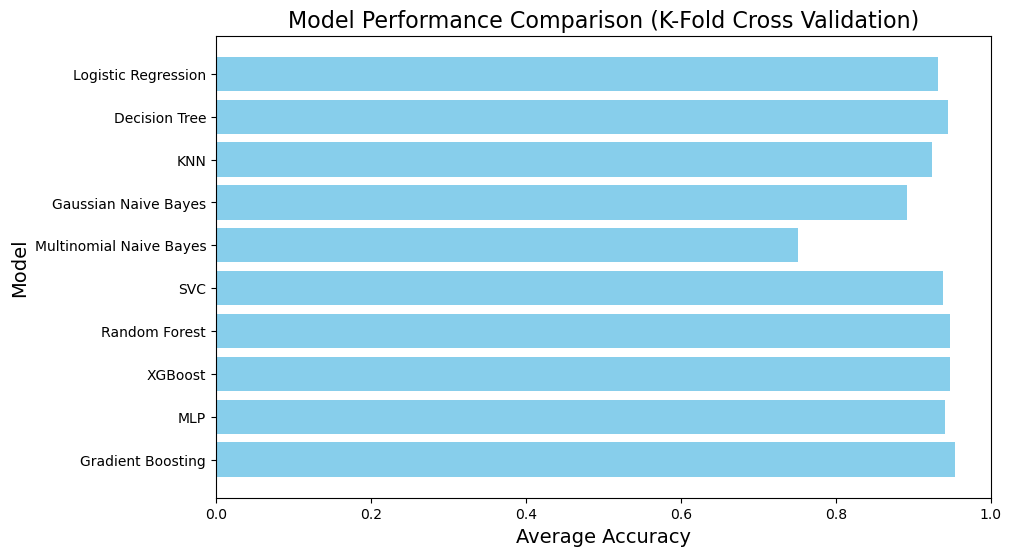


Best Performing Model: Gradient Boosting with Average Accuracy: 0.9534


In [52]:
models_scores = {
    'Logistic Regression': np.mean(lr_model_scores),
    'Decision Tree': np.mean(dt_model_scores),
    'KNN': np.mean(knn_model_scores),
    'Gaussian Naive Bayes': np.mean(gnb_model_scores),
    'Multinomial Naive Bayes': np.mean(mnb_model_scores),
    'SVC': np.mean(svc_model_scores),
    'Random Forest': np.mean(rf_model_scores),
    'XGBoost': np.mean(xgb_model_scores),
    'MLP': np.mean(mlp_model_scores),
    'Gradient Boosting': np.mean(gb_model_scores)
}

best_model_name = max(models_scores, key=models_scores.get)
best_model_score = models_scores[best_model_name]


plt.figure(figsize=(10, 6))
plt.barh(list(models_scores.keys()), list(models_scores.values()), color='skyblue')
plt.xlabel('Average Accuracy', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.title('Model Performance Comparison (K-Fold Cross Validation)', fontsize=16)
plt.xlim(0, 1) 
plt.gca().invert_yaxis()  
plt.show()

print(f"\nBest Performing Model: {best_model_name} with Average Accuracy: {best_model_score:.4f}")


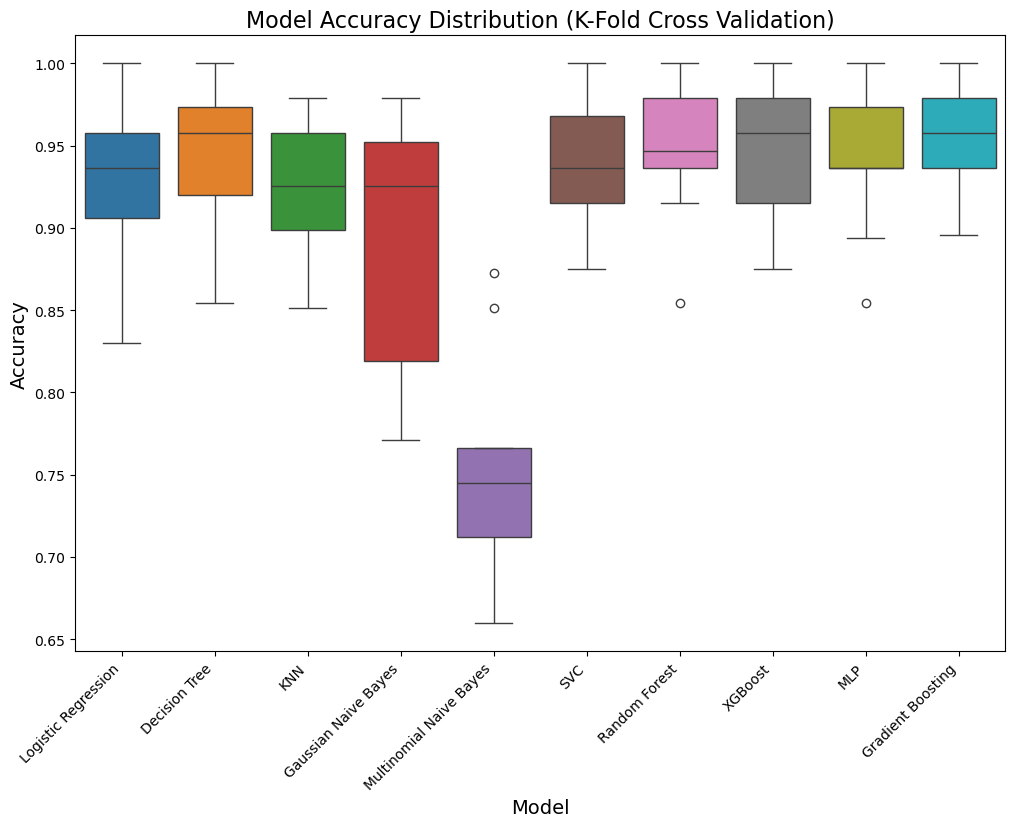

In [54]:
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Gaussian Naive Bayes', 'Multinomial Naive Bayes', 
          'SVC', 'Random Forest', 'XGBoost', 'MLP', 'Gradient Boosting']
scores = [
    lr_model_scores, dt_model_scores, knn_model_scores, gnb_model_scores, mnb_model_scores,
    svc_model_scores, rf_model_scores, xgb_model_scores, mlp_model_scores, gb_model_scores
]

plt.figure(figsize=(12, 8))
sns.boxplot(data=scores)
plt.xticks(np.arange(len(models)), models, rotation=45, ha='right')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy Distribution (K-Fold Cross Validation)', fontsize=16)
plt.show()

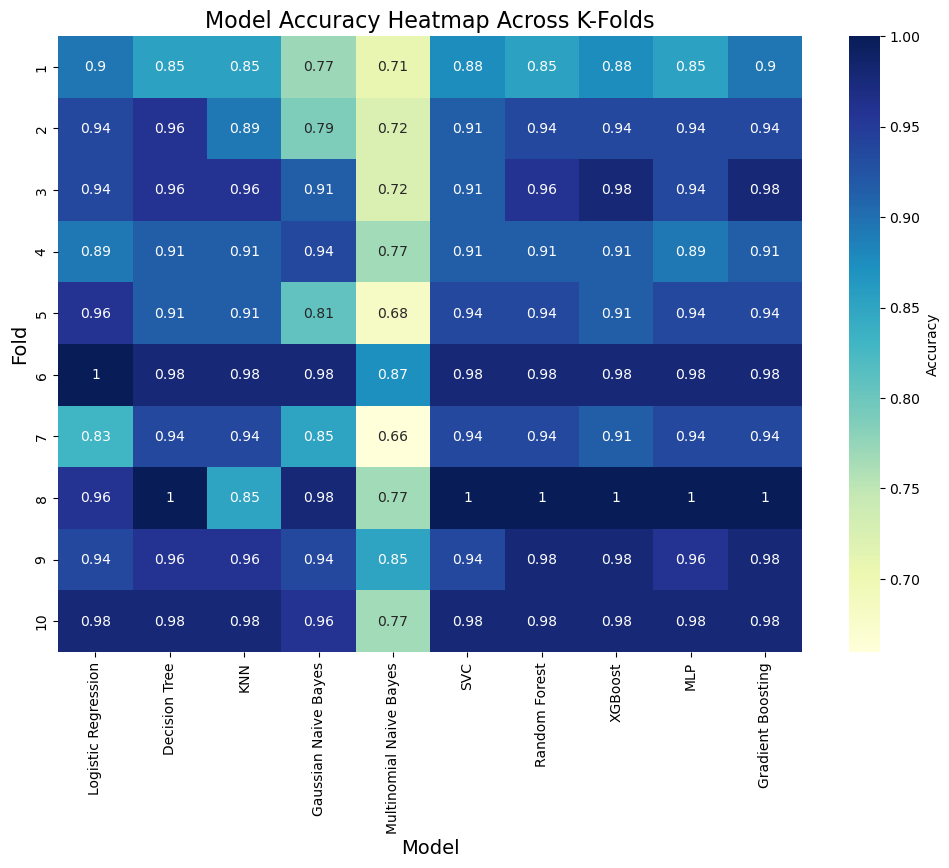

In [56]:
folds = np.array([range(1, k+1)]).T  
heatmap_data = np.array([score for score in scores]).T  # 

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', xticklabels=models, yticklabels=folds.flatten(), cbar_kws={'label': 'Accuracy'})
plt.xlabel('Model', fontsize=14)
plt.ylabel('Fold', fontsize=14)
plt.title('Model Accuracy Heatmap Across K-Folds', fontsize=16)
plt.show()